## 1\. K-Means 군집 분석

  - **비즈니스 문제**: 수만 명의 고객 데이터를 보유하고 있지만, 이들을 어떻게 관리하고 마케팅해야 할지 막막한 상황. 모든 고객에게 동일한 마케팅을 하는 것은 비효율적임.
  - **해결책**: \*\*`군집 분석(Clustering)`\*\*은 정답이 없는 데이터 속에서 숨겨진 유사한 특징을 가진 그룹(고객군)을 자동으로 찾아내는 분석 기법임.
  - **기대효과**: 데이터를 의미 있는 집단으로 나누고 각 집단의 특성을 파악하여 **맞춤형 전략**을 수립할 수 있음.

-----

## 2\. 핵심 원리 파헤치기 (Deep Dive)

  - **`군집 분석`**: 데이터의 특성을 고려해 비슷한 데이터끼리 묶어 하나의 \*\*`집단(cluster)`\*\*으로 정의하는 작업. 이 과정을 \*\*`클러스터링(clustering)`\*\*이라고 함.
  - **역할**: 정답 없는 상태에서 데이터 구조를 파악하는 \*\*`탐색적 데이터 분석(Exploratory Data Analysis)`\*\*의 핵심적인 역할을 함.
  - **군집 모델 종류**:
      - **`중심 모델 (Centroid models)`**: 각 클러스터의 중심점을 찾는 방식 (`K-Means`가 대표적).
      - **`연결 모델 (Connectivity models)`**: 데이터 간 거리 연결성을 기반으로 모델을 만드는 방식 (계층적 클러스터링).
      - **`밀도 모델 (Density models)`**: 데이터가 밀집된 영역을 클러스터로 정의하는 방식 (`DBSCAN`).

-----

### K-Means 알고리즘: '우리 동네 대표' 뽑기 비유

  - \*\*`K-Means`\*\*의 작동 원리는 '우리 동네 대표(중심점)를 뽑고, 가장 가까운 대표에게 소속되는 과정'에 비유할 수 있음.

<!-- end list -->

1.  **대표 선출 (k명)**: 그룹 수 \*\*`k`\*\*를 정하고, `k`개의 '임시 대표'(초기 중심점)를 임의의 위치에 배치함.
2.  **소속 정하기 (클러스터 할당)**: 모든 데이터는 자신과 가장 가까운 거리에 있는 '임시 대표'의 그룹에 소속됨.
3.  **대표 위치 재조정 (중심점 업데이트)**: 각 그룹에 소속된 데이터들의 위치를 고려하여, 그룹의 가장 중앙이 되는 지점으로 대표의 위치를 이동시킴.
4.  **반복**: 대표의 위치가 더 이상 변하지 않거나, 데이터들의 소속이 바뀌지 않을 때까지 2, 3번 과정을 반복함.

<!-- end list -->

  - **목표**: "모든 데이터 포인트에서 각자 소속된 클러스터 대표까지의 거리 제곱의 총합을 최소화하는 것". 이 값을 \*\*`Inertia`\*\*라고 부르며, 이 값이 작을수록 각 클러스터의 데이터들이 중심점에 잘 뭉쳐있음을 의미함.

  - **수식 표현**:
$$J=\sum_{k=1}^{K}\sum_{i\in C_{k}}d(x_{i},\mu_{k})$$

      - $d(x\_{i},\mu\_{k})$: 데이터 $x\_i$와 k번째 클러스터의 중심 $\mu\_k$ 사이의 거리. 보통 유클리드 거리의 제곱을 사용함 ($||x\_{i}-\mu\_{k}||^{2}$).

  - **단점**: 분석가가 직접 `k`값을 지정해야 하고, 클러스터의 크기가 비슷하고 원형일 것이라고 가정하여 실제 데이터 분포와 다를 경우 경계를 잘못 나눌 수 있음.

-----

## 3\. 실전 코드 분석 및 적용 (Code Walkthrough & Application)

### 3.1 Scikit-learn의 군집 모델

  - \*\*`Scikit-learn`\*\*은 다양한 군집 분석 클래스를 제공함.

| 클래스명(sklearn.cluster,\*) | 설명 |
| :--- | :--- |
| `AffinityPropagation(*[, damping, ...])` | 데이터의 선호도 전파 클러스터링을 수행합니다. |
| `AgglomerativeClustering([...])` | 응집 클러스터링을 수행합니다. |
| `Birch([, threshold, ...])` | Birch 클러스터링을 수행합니다. |
| `DBSCAN([eps, min_samples, metric, ...])` | DBSCAN 클러스터링을 수행합니다. |
| `FeatureAgglomeration([n_clusters, ...])` | 특징 응집 클러스터링을 수행합니다. |
| `KMeans([n_clusters, init, n_init, ...])` | K-Means 클러스터링을 수행합니다. |
| `MiniBatchKMeans([n_clusters, init, ...])` | 미니배치 K-Means 클러스터링을 수행합니다. |
| `MeanShift([, bandwidth, seeds, ...])` | 평균 이동 클러스터링을 수행합니다. |
| `OPTICS(*[, min_samples, max_eps, ...])` | OPTICS 클러스터링을 수행합니다. |
| `Spectral Clustering([n_clusters, ...])` | 스팩트럼 클러스터링을 수행합니다. |
| `SpectralBiclustering([n_clusters, ...])` | 스펙트럼 이중 클러스터링을 수행합니다. |
| `Spectral Coclustering([n_clusters, ...])` | 스펙트럼 공동 클러스터링을 수행합니다. |

-----

### 3.2 `sklearn.cluster.KMeans` 파헤치기

  - **`KMeans` 클래스의 주요 파라미터**

| 인자 | 타입 | 기본값 | 설명 |
| :--- | :--- | :--- | :--- |
| **`n_clusters`** | 정수 | 8 | 클러스터의 수를 지정합니다. |
| **`init`** | 'k-means++', 'random' 또는 ndarray | 'k-means++' | 초기화 방법을 지정합니다.<br>- 'k-means++': 초기 중심점을 더 현명하게 선택하여 수렴 속도를 높입니다.<br>- 'random': 초기 중심점을 무작위로 선택합니다. |
| **`n_init`** | 정수 | 10 | 다른 초기 중심점으로 알고리즘을 반복 실행할 횟수입니다. 가장 좋은 결과를 최종 결과로 선택합니다. |
| **`max_iter`** | 정수 | 300 | 알고리즘의 최대 반복 횟수입니다. |
| **`random_state`** | 정수 또는 RandomState 인스턴스 | None | 중심 초기화를 위한 난수 시드를 결정하여 실험의 재현성을 보장합니다. |

  - **`KMeans` 객체의 주요 속성**

| 인자 | 설명 |
| :--- | :--- |
| **`cluster_centers_`** | [n\_clusters, n\_features] 배열, 클러스터 중심점의 좌표. |
| **`labels_`** | 각 데이터 포인트에 할당된 클러스터 라벨. |
| **`inertia_`** | 실수(float), 가장 가까운 클러스터 중심까지의 거리 제곱의 합계. |
| **`n_iter_`** | 실행된 반복 횟수. |

-----

### 3.3 가상 데이터로 K-Means 실행하기

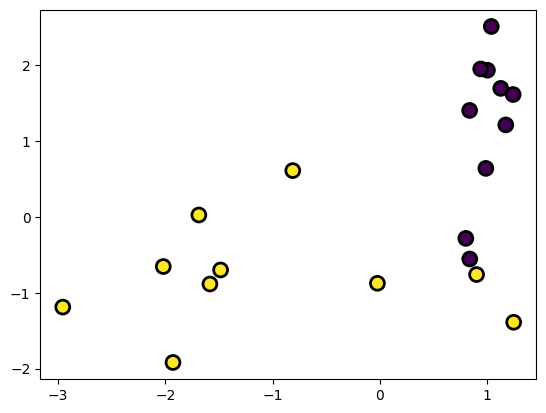

In [1]:
# 필요한 라이브러리를 불러옵니다.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# 분류용 가상 데이터셋 생성
# 20개의 샘플, 2개의 특성, 2개의 클래스를 가진 데이터를 만듭니다.
X, y = make_classification(n_samples=20, n_features=2,
										n_informative=2,
										 n_redundant=0, n_clusters_per_class=1,
										 n_classes=2, random_state=123) # random_state로 재현성 보장

# 생성된 데이터를 산점도로 시각화합니다.
# c=y는 실제 클래스(0 또는 1)에 따라 색상을 다르게 표시하라는 의미입니다.
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor='k', linewidth=2)
plt.show()

- 데이터에 K-Means 클러스터링을 적용.

<!-- end list -->

In [2]:
from sklearn.cluster import KMeans

# KMeans 모델을 생성하고 학습시킵니다.
# n_clusters=2: 데이터를 2개의 군집으로 나눕니다.
# init="random": 초기 중심점을 무작위로 선택합니다.
# random_state=1: 결과 재현을 위해 난수 시드를 고정합니다.
model = KMeans(n_clusters=2, init="random", random_state=1)
model.fit(X)

KMeans(init='random', n_clusters=2, random_state=1)

- 학습 완료 후 속성 확인.

<!-- end list -->

In [3]:
# 두 클러스터의 최종 중심점을 출력합니다.
print("클러스터 중심점:")
print(model.cluster_centers_)

# 클러스터링을 통해 각 데이터에 할당된 레이블(0 또는 1)을 출력합니다.
pred = model.predict(X)
print("\n예측된 레이블:")
print(pred)

클러스터 중심점:
[[-1.56258716 -0.69768199]
 [ 1.01138251  0.83200493]]

예측된 레이블:
[1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]


- 클러스터링 결과 시각화.

<!-- end list -->

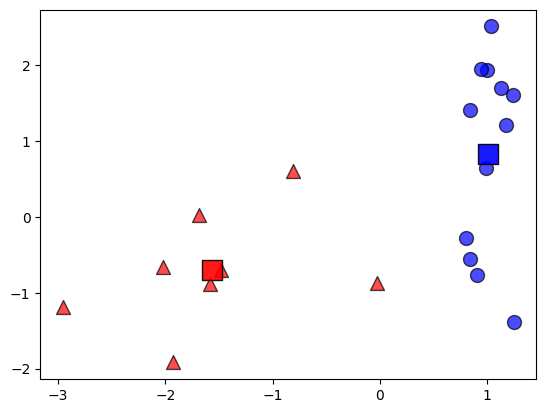

In [4]:
# 모델이 찾은 두 클러스터의 중심점을 변수에 저장합니다.
c0, c1 = model.cluster_centers_

# 0번 클러스터(빨간 삼각형) 그리기
plt.scatter(x=X[model.labels_ == 0, 0], y=X[model.labels_ == 0, 1],
            s=100, marker='^', c='r', edgecolor='k', alpha=0.7)

# 1번 클러스터(파란 원) 그리기
plt.scatter(x=X[model.labels_ == 1, 0], y=X[model.labels_ == 1, 1],
            s=100, marker='o', c='b', edgecolor='k', alpha=0.7)

# 0번 클러스터의 중심(빨간 네모) 그리기
plt.scatter(x=c0[0], y=c0[1], s=200, marker='s', c='r', edgecolor='k', alpha=0.9)

# 1번 클러스터의 중심(파란 네모) 그리기
plt.scatter(x=c1[0], y=c1[1], s=200, c='b', marker='s', edgecolor='k', alpha=0.9)

plt.show()

- 각 데이터 포인트가 어떻게 클러스터에 할당되었는지 거리 계산으로 확인.

<!-- end list -->

In [5]:
import pandas as pd
import numpy as np

# 데이터(X), 각 중심점까지의 거리(d0, d1), 할당된 클래스를 DataFrame으로 만듭니다.
# np.linalg.norm(X - c0, axis=1)은 각 데이터 포인트와 중심점 c0 사이의 유클리드 거리를 계산합니다.
df = pd.DataFrame(data=np.c_[X,
                              np.linalg.norm(X - c0, axis=1),
                              np.linalg.norm(X - c1, axis=1),
                              model.labels_],
                  columns=['X0', 'X1', 'd0', 'd1', 'class'])

df.head()

,X0,X1,d0,d1,class
0,1.038596,2.511754,4.131178,1.679969,1.0
1,1.002714,1.935215,3.675992,1.103245,1.0
2,-1.688105,0.025994,0.734481,2.817248,0.0
3,0.901344,-0.758966,2.464693,1.594771,1.0
4,0.836531,1.404882,3.190070,0.598967,1.0


- **코드 해설**: `np.linalg.norm()` 함수는 두 점 사이의 유클리드 거리를 계산함. 데이터프레임은 각 점이 두 중심점(c0, c1) 중 더 가까운 거리(d0 또는 d1)를 가진 클러스터에 할당되었음을 보여줌.

-----

### 3.4 학습 회차별 군집 과정 시각화하기

  - `max_iter` 파라미터를 1부터 늘려가며 중심점 이동 및 클러스터 형성 과정을 시각화함.

<!-- end list -->

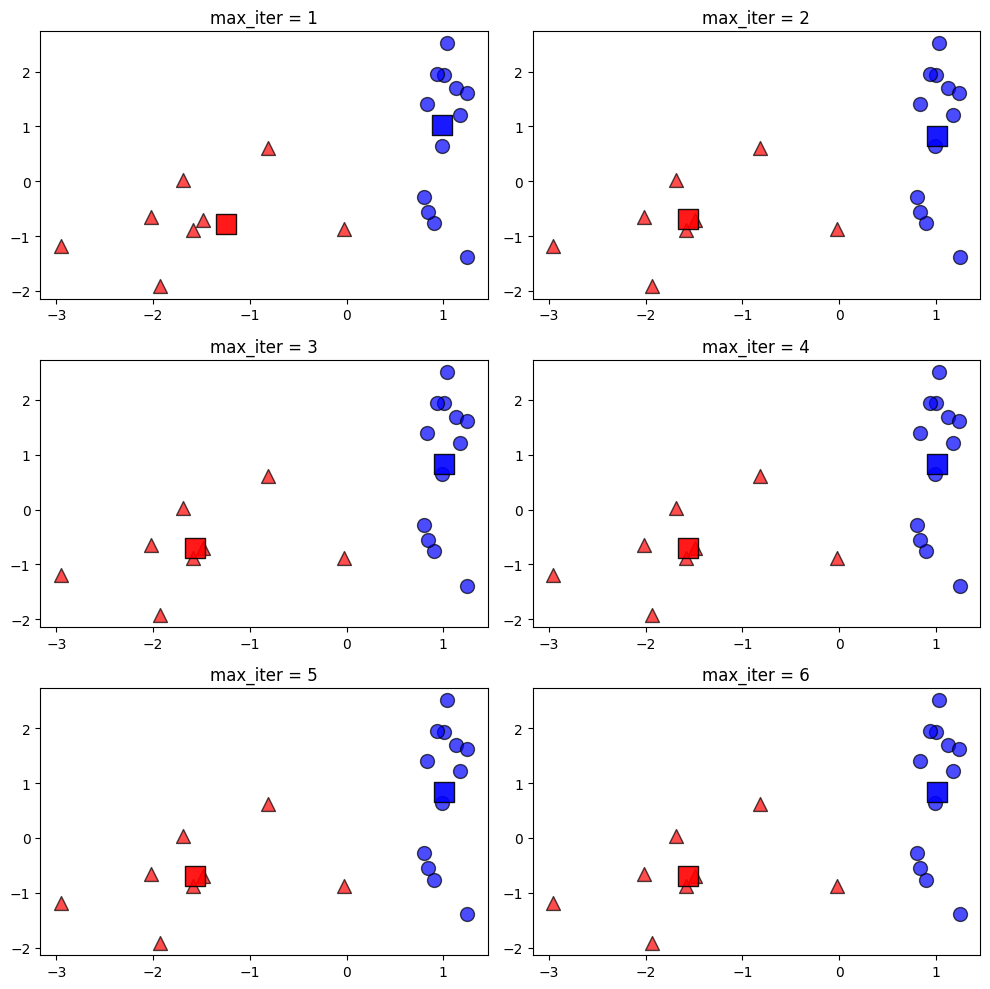

In [6]:
# 시각화를 위한 함수를 정의합니다.
def plot_clusters(model, data):
    c0, c1 = model.cluster_centers_
    plt.scatter(x=data[model.labels_ == 0, 0], y=data[model.labels_ == 0, 1],
                s=100, marker='^', c='r', edgecolor='k', alpha=0.7)
    plt.scatter(x=data[model.labels_ == 1, 0], y=data[model.labels_ == 1, 1],
                s=100, marker='o', c='b', edgecolor='k', alpha=0.7)
    plt.scatter(x=c0[0], y=c0[1], s=200, c='r', marker='s', edgecolor='k', alpha=0.9)
    plt.scatter(x=c1[0], y=c1[1], s=200, c='b', marker='s', edgecolor='k', alpha=0.9)

# 3x2 그리드에 학습 과정을 그립니다.
plt.figure(figsize=(10, 10))

# for문을 사용하여 반복 횟수(max_iter)를 1부터 6까지 늘려가며 모델을 학습하고 시각화합니다.
for i in range(6):
    model = KMeans(n_clusters=2, init="random", n_init=3,
                   max_iter=(i + 1), random_state=1)
    model.fit(X)
    plt.subplot(3, 2, (i + 1))
    plt.title(f"max_iter = {i+1}")
    plot_clusters(model, X)

plt.tight_layout()
plt.show()

-----

### 3.5 실제 데이터 적용: Iris 데이터 군집 분석

In [7]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# iris 데이터셋을 로드합니다.
iris = sns.load_dataset("iris")
iris_X = iris.iloc[:, :-1] # 마지막 'species' 열을 제외한 특성 데이터
iris_y = iris.species     # 'species' 열 (정답 레이블)

# KMeans 모델 생성 및 학습 (붓꽃 품종이 3개이므로 n_clusters=3으로 설정)
iris_cluster_model = KMeans(n_clusters=3, random_state=1)
iris_cluster_model.fit(iris_X)

# 군집 분석 결과 확인
# 클러스터 레이블(0, 1, 2)은 실제 품종 이름과 순서가 다를 수 있습니다.
print("군집 결과 레이블 (원본):")
print(iris_cluster_model.labels_)

군집 결과 레이블 (원본):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- 결과를 원본 데이터와 비교하기 위해 레이블을 조정하고 시각화.

<!-- end list -->

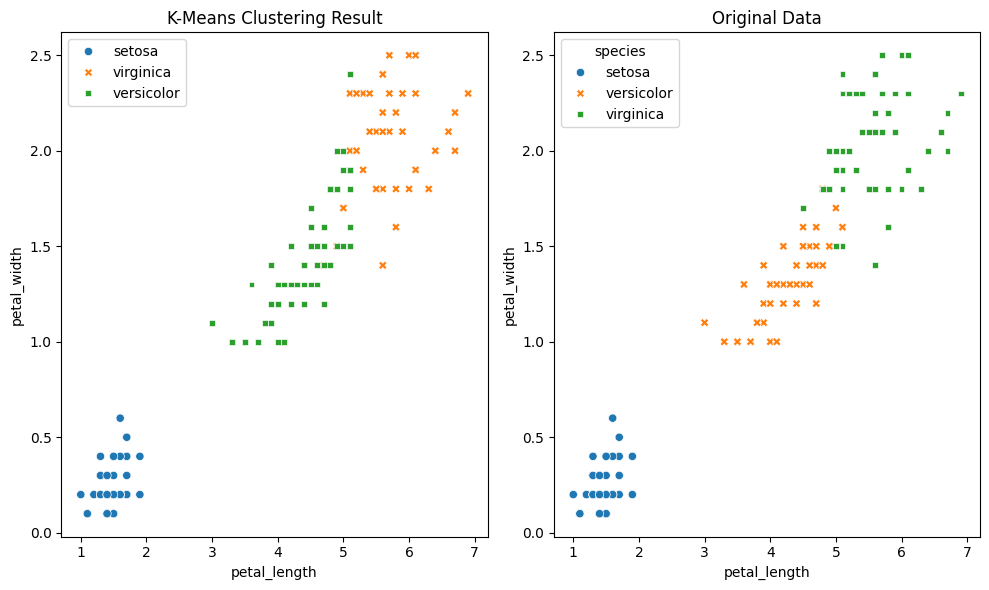

In [8]:
# np.choose를 사용해 레이블을 재조정합니다.
# 원본 클러스터 결과에서 1->0, 0->1, 2->2로 매핑합니다.
pred = np.choose(iris_cluster_model.labels_, [1, 0, 2]).astype(np.int64)

# 레이블 인코더를 사용해 숫자 레이블을 다시 품종 이름으로 변환합니다.
le = LabelEncoder()
le.fit(iris.species)
pred_str = le.inverse_transform(pred)

# 군집 분석 결과를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x="petal_length", y="petal_width", hue=pred_str,
                style=pred_str, data=iris)
plt.title("K-Means Clustering Result")

# 원본 데이터의 산점도를 그립니다.
plt.subplot(1, 2, 2)
sns.scatterplot(x="petal_length", y="petal_width",
                hue="species", style="species", data=iris)
plt.title("Original Data")

plt.tight_layout()
plt.show()

- **코드 해설**: 두 산점도를 비교하면, K-Means가 **`setosa`** 품종은 완벽하게 구분했으나, 특성이 유사하여 겹치는 영역이 있는 \*\*`versicolor`\*\*와 \*\*`virginica`\*\*는 일부 잘못 분류했음을 확인할 수 있음.

-----

## 4\. 핵심 요약 (Key Takeaways)

  - **비즈니스 관점**: \*\*`K-Means`\*\*는 정답 레이블이 없는 데이터(예: 고객 구매 기록)에서 자연스러운 그룹(예: VIP 고객, 일반 고객, 이탈 위험 고객)을 찾아내는 강력하고 직관적인 방법임. 이를 통해 각 그룹에 맞는 **차별화된 마케팅 및 비즈니스 전략**을 수립할 수 있음.
  - **기술적 관점**: \*\*`K-Means`\*\*는 **`Inertia`**(클러스터 내 응집도) 값을 최소화하는 것을 목표로, \*\*`클러스터 할당`\*\*과 **`중심점 업데이트`** 단계를 반복하는 알고리즘임.
  - **실무적 관점**: 가장 중요한 하이퍼파라미터는 군집의 개수 \*\*`k`\*\*이며, 이는 분석가가 직접 결정해야 함. 거리 기반 알고리즘이므로 사전 **데이터 스케일링**이 중요하며, 원형이 아닌 복잡한 형태의 군집을 찾는 데는 한계가 있음.